In [3]:

import skimage
import tensorflow as tf
import pandas as pd
import tarfile
import tqdm
import cv2
import os
from keras.models import load_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from get_embeddings import get_embeddings


In [4]:
#Load celebs images and embeddings
celeb = pd.read_pickle("celeb40_full_identities_pickle")
images = celeb["images"]
images = np.stack(images)
embeddings = celeb["embeddings"]
embeddings = np.stack(embeddings)

In [5]:
def get_prototype(person):
    person_idx = celeb.index[celeb["person"]==person].tolist()

    
    if len(person_idx) ==0:
        prototype = 0
    
    else:
        emb_value = 0     
        for i in person_idx:
            emb_value = emb_value + embeddings[i]
        prototype = emb_value/len(person_idx)
    return prototype

In [8]:
#List of prototypes of the first n people of the dataset
n = 50 
prototypes = [0]
for i in range(n):
    prototypes.append(get_prototype(i+1))
print(len(prototypes))

51


In [6]:

def normalize(v):#all values between 0 and 1
    return (v - np.min(v)) / (np.max(v) - np.min(v))

    
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
    plt.axis("off")
    
decoder = load_model("decoder_celeb.h5")#("decoder_in_celeb2.h5")#("decoder_celeb_200_onward.h5")

def get_most_important_features(image2, embedding1, embedding2, same_category= True, plot = False): #images, embeddings after index2


    #Select embedding most important features     
    print( np.dot(embedding1,embedding2)/(np.linalg.norm(embedding1)*np.linalg.norm(embedding2)))
    dist = abs(embedding1 - embedding2)
    norm_dist = normalize(dist)           

    if same_category:
        perturbation =  0.3 *abs(norm_dist - 1)

    else:
        perturbation = (norm_dist) * 0.3
 
    x = decoder.predict((embedding2)[None])[0] #original reconstruction

    
    x_til = decoder.predict((perturbation + embedding2)[None])[0]
    changes = abs((x_til - x))
    changes = normalize(changes)

    
    #PLOT
    if plot:
        b = 0.7
        selection = (changes > b)*1
        for i in range(selection.shape[0]):
            for j in range(selection.shape[1]):
                if 1 in selection[i,j]:
                    selection[i,j] = [1,1,0]
                


                
        plt.subplot(1,6,1) 
        plt.title("reference")
        show_image(decoder.predict((embedding1)[None])[0]) 
        

        plt.subplot(1,6,2) 
        plt.title("original")
        show_image(image2)
        
        plt.subplot(1,6,3) 
        plt.title("reconstruido")
        show_image(x)

        
        plt.subplot(1,6,4) 
        plt.title("")
        show_image(image2 + selection*100)
        
        
        plt.subplot(1,6,5) 
        plt.title("")
        show_image(x + selection*100)
        
        
        heat_map = np.zeros((40,40))
        for i in range(selection.shape[0]):
            for j in range(selection.shape[1]):
                    heat_map[i,j] = sum(changes[i,j])
                    
        plt.subplot(1,6,6) 
        plt.title("")
        show_image(heat_map*0.25)
        
        plt.axis("off")

        plt.show()

    
    return changes


0.8413556170468766


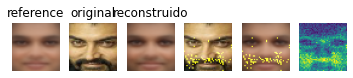

In [9]:
n = 12
person_idx = celeb.index[celeb["person"]== n].tolist()
#print(index1)
index1 = person_idx[0]
#index1 = 5
#index2 = 16
a= get_most_important_features(images[index1], prototypes[n], embeddings[index1], same_category= True, plot = True) #images, embeddings after index2
#show_image(a)
#plt.savefig("original 1", format = pdf)